In [1]:
from src.modules.dataset import FlickrDataset, Collate
from torch.utils.data import DataLoader
from src.modules.model import EncoderCNN, DecoderRNN, CNNtoRNN
import torch
from tqdm import tqdm
import plotly.express as px
import plotly.io as pio
import torchvision.transforms as T

pio.renderers.default = 'png'

In [2]:
imgs_path = '/mnt/s/CV/data/Images'
captions_path = '/mnt/s/CV/data/captions.txt'

In [3]:
batch_size = 8
embed_size = 512
hidden_size = 512
num_features = 2048
num_epochs = 20

In [4]:
dataset = FlickrDataset(imgs_path, captions_path)
collate = Collate(pad_idx=dataset.vocab.word2idx['<PAD>'])
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, collate_fn=collate)

In [5]:
vocab_size = len(dataset.vocab)
vocab = dataset.vocab
model = CNNtoRNN(
    embed_size=embed_size,
    num_features=num_features,
    hidden_size=hidden_size,
    vocab_size=vocab_size
).cuda()

In [6]:
img_batch, cap_batch = next(iter(dataloader))
img_batch = img_batch.cuda()
cap_batch = cap_batch.cuda()

In [7]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

inv_normalize = T.Normalize(
   mean = [-m/s for m, s in zip(mean, std)],
   std = [1/s for s in std]
)

In [8]:
model.forward(img_batch, cap_batch)

torch.Size([8, 10, 2048])


/home/screamer/anaconda3/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning:

Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)



tensor([[[-2.1037e-01, -1.1884e-01, -1.3702e-01,  ...,  1.5717e-01,
          -1.2443e-01, -5.3725e-02],
         [-1.1638e-01, -1.2998e-02, -1.4530e-01,  ..., -2.2534e-01,
          -1.4333e-01, -2.0682e-02],
         [ 2.1867e-01, -4.2449e-02,  3.0941e-02,  ...,  2.7453e-01,
          -9.4294e-02, -1.1088e-01],
         ...,
         [ 6.2091e-02,  1.3278e-01, -7.3297e-03,  ...,  1.6328e-01,
           7.1810e-02, -7.1679e-02],
         [ 8.3122e-02, -5.8246e-02, -2.2317e-01,  ..., -4.3066e-03,
           5.0649e-02, -9.2798e-02],
         [ 1.5749e-01,  6.8822e-02,  1.0552e-01,  ...,  9.6383e-02,
          -3.8996e-02, -1.0543e-01]],

        [[-2.5638e-01, -2.1527e-01, -1.2054e-01,  ..., -9.0850e-02,
          -3.0995e-02,  6.5944e-03],
         [-3.3146e-01, -9.9092e-02, -7.9994e-02,  ...,  3.8693e-02,
          -2.0179e-01,  1.0058e-01],
         [-2.2781e-01, -8.2561e-02, -4.7444e-02,  ...,  1.0209e-01,
          -1.2967e-02,  2.2699e-01],
         ...,
         [-1.9422e-01,  1

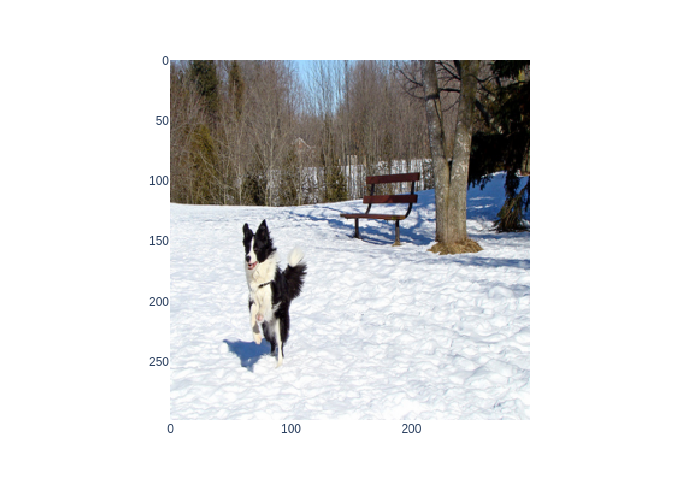

Epoch: 0


  0%|          | 0/5057 [00:00<?, ?it/s]/home/screamer/anaconda3/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning:

Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)

100%|██████████| 5057/5057 [11:52<00:00,  7.09it/s]


a black dog is a in the . <EOS>
Loss: 3.626

Epoch: 1


100%|██████████| 5057/5057 [11:47<00:00,  7.14it/s]


a black dog is jumping a a of a . <EOS>
Loss: 3.717

Epoch: 2


100%|██████████| 5057/5057 [11:40<00:00,  7.22it/s]


a black and white dog is a dog in the air . <EOS>
Loss: 4.452

Epoch: 3


100%|██████████| 5057/5057 [11:43<00:00,  7.19it/s]


a dog is jumping over a . <EOS>
Loss: 3.969

Epoch: 4


100%|██████████| 5057/5057 [11:45<00:00,  7.17it/s]


a black and white dog is jumping a a . <EOS>
Loss: 2.907

Epoch: 5


100%|██████████| 5057/5057 [11:43<00:00,  7.19it/s]


a black and white dog is running through a . <EOS>
Loss: 4.109

Epoch: 6


100%|██████████| 5057/5057 [11:43<00:00,  7.18it/s]


a black dog is a a in its mouth . <EOS>
Loss: 2.754

Epoch: 7


100%|██████████| 5057/5057 [11:43<00:00,  7.18it/s]


a black and white dog is running through the grass . <EOS>
Loss: 3.279

Epoch: 8


100%|██████████| 5057/5057 [11:43<00:00,  7.19it/s]


a dog runs through the air . <EOS>
Loss: 3.957

Epoch: 9


100%|██████████| 5057/5057 [11:40<00:00,  7.22it/s]


a dog is running through the . <EOS>
Loss: 4.125

Epoch: 10


100%|██████████| 5057/5057 [11:43<00:00,  7.19it/s]


a dog is running through the air . <EOS>
Loss: 2.524

Epoch: 11


100%|██████████| 5057/5057 [11:45<00:00,  7.17it/s]


a dog jumps to catch a ball in its mouth . <EOS>
Loss: 3.214

Epoch: 12


100%|██████████| 5057/5057 [11:38<00:00,  7.24it/s]


a black and white dog is jumping in the water . <EOS>
Loss: 3.952

Epoch: 13


100%|██████████| 5057/5057 [11:41<00:00,  7.21it/s]


a dog is running through the air . <EOS>
Loss: 2.856

Epoch: 14


100%|██████████| 5057/5057 [11:44<00:00,  7.17it/s]


a black and white dog is running through a puddle . <EOS>
Loss: 3.057

Epoch: 15


100%|██████████| 5057/5057 [11:39<00:00,  7.23it/s]


a black and white dog is jumping over a wooden bench . <EOS>
Loss: 3.535

Epoch: 16


100%|██████████| 5057/5057 [11:45<00:00,  7.17it/s]


a black and white dog is jumping over a large dog . <EOS>
Loss: 2.644

Epoch: 17


100%|██████████| 5057/5057 [11:43<00:00,  7.18it/s]


a dog jumps over a snowy field . <EOS>
Loss: 2.345

Epoch: 18


100%|██████████| 5057/5057 [11:43<00:00,  7.19it/s]


a dog is running through a water . <EOS>
Loss: 2.73

Epoch: 19


100%|██████████| 5057/5057 [11:44<00:00,  7.18it/s]


a black and white dog is jumping in the air . <EOS>
Loss: 3.116



In [8]:
lr = 1e-4
optimizer = torch.optim.Adam(
    params=model.parameters(), 
    lr=lr
)
criterion = torch.nn.CrossEntropyLoss(ignore_index=vocab.word2idx['<PAD>']).cuda()


px.imshow(inv_normalize(img_batch[0].cpu()).permute(1, 2, 0)).show()
for epoch in range(num_epochs):
    print(f'Epoch: {epoch}')
    for i, (imgs, captions) in enumerate(tqdm(dataloader), start=1):
        imgs = imgs.cuda()
        captions: torch.Tensor = captions.cuda()
        captions_input = captions[:, :-1]
        captions_expected = captions[:, 1:]
        optimizer.zero_grad()
        outputs: torch.Tensor = model(
            imgs,
            captions_input
        )
        loss: torch.Tensor = criterion(
            outputs.contiguous().view(-1, vocab_size),
            captions_expected.contiguous().view(-1)
        )
        loss.backward()
        optimizer.step()
    preds = model.greedy_search(img_batch[0])
    preds = [vocab.idx2word[idx] for idx in preds]
    print(' '.join(preds))
    print('Loss:', round(loss.item(), 3))
    print()
torch.save(model.state_dict(), 'weights.pt')

In [9]:
model.load_state_dict(torch.load('weights.pt'))

<All keys matched successfully>

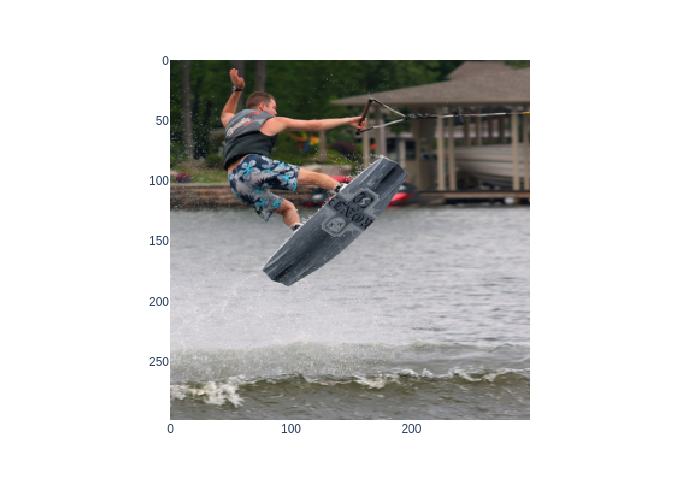

['bodyboard',
 'rocker',
 'combat',
 'fashion',
 'heads',
 'streets',
 'flooded',
 'offstage',
 'holding',
 'lacrosse',
 'beagle',
 'digital',
 'insect',
 'holding',
 'space',
 'curious',
 'wire',
 'routine',
 'flops',
 'curious']

In [8]:
# # ImageNet mean and std
# mean = [0.485, 0.456, 0.406]
# std = [0.229, 0.224, 0.225]

# inv_normalize = T.Normalize(
#    mean = [-m/s for m, s in zip(mean, std)],
#    std = [1/s for s in std]
# )
img_batch, cap_batch = next(iter(dataloader))
img = img_batch[0].cuda()
cap = cap_batch[0].cuda()
idx = 0
px.imshow(inv_normalize(img.cpu()).permute(1, 2, 0)).show()
[vocab.idx2word[idx] for idx in model.greedy_search(img)]